# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset

In [2]:
data = pd.read_csv('CCPP_data.csv')

# Check for missing values

In [3]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


# Drop rows with missing values (if any)

In [4]:
data.dropna(inplace=True)

# EDA

In [5]:
print("Dataset summary statistics:")
print(data.describe())

Dataset summary statistics:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


# Visualize distributions

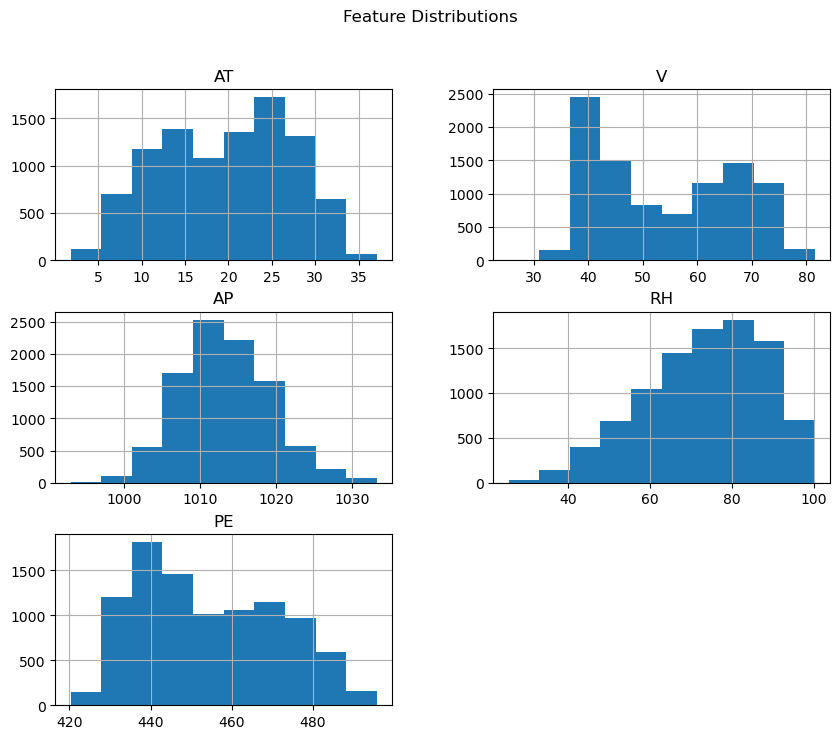

In [7]:
data.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()


# Define features (X) and target (y)

In [9]:
X = data[['AT', 'AP', 'RH', 'V']]
y = data['PE']

# Normalize features for Linear Regression

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models

In [15]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Train models

In [17]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Cross-validation scores

In [19]:
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression CV RMSE: {np.sqrt(-np.mean(cv_scores_lr))}")
print(f"Random Forest CV RMSE: {np.sqrt(-np.mean(cv_scores_rf))}")

Linear Regression CV RMSE: 4.573755135841366
Random Forest CV RMSE: 3.4663239493234443


# Make predictions

In [21]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models

In [24]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Linear Regression R²: {r2_lr}")
print(f"Random Forest R²: {r2_rf}")

Linear Regression RMSE: 4.502633229532186
Random Forest RMSE: 3.245305819687366
Linear Regression R²: 0.9301046431962188
Random Forest R²: 0.963689984097263



# Feature Importance (Random Forest)

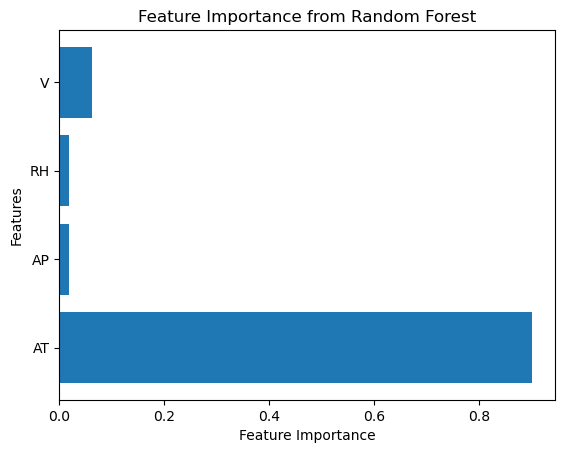

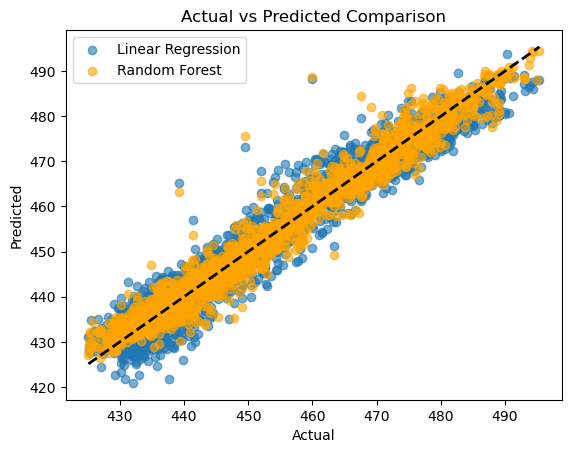

In [26]:
feature_importance = rf.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

# Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()

# Residual plot for Random Forest

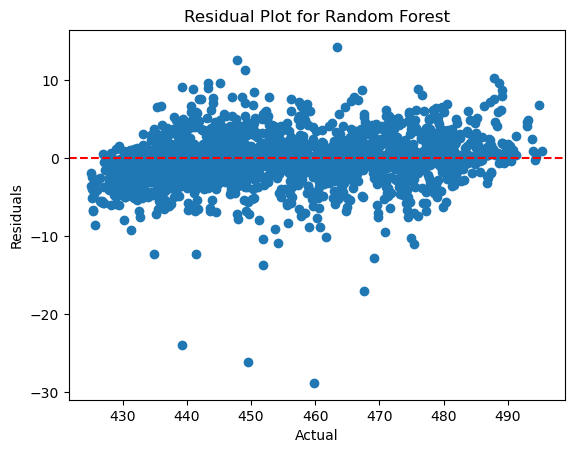

In [28]:
residuals = y_test - y_pred_rf
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()
